In [1]:
import pandas as pd
import matplotlib 
import shapely
import json
import numpy as np
from selenium import webdriver
import numpy as np  # Numerical operations
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import geopandas as gpd #for coordinates
import plotly.express as px
import folium
import leafmap
import leafmap.foliumap as leafmap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import re
import os
import mapclassify
from IPython.display import display, HTML  # Displaying HTML output in Jupyter notebooks
import warnings  # Suppress warnings
from colorama import Fore, Style  # Colored terminal text


In [2]:
df = pd.read_csv(r"C:\Users\Varnosafety INT\Downloads\Gender Gap Survey.csv", encoding='windows-1252')

In [3]:
df.head(20)

,What is your current gender identity?,What is your age group?,What is your highest level of education?,How many years of experience do you have in the energy sector?,What is your current role or position within the energy sector?,Have you held a leadership/management role?,To what extent do you agree that your company promotes gender equality?,Have you had a professional mentor during your career in the energy sector\n,On a scale do you feel Mentor(s) contributed positively to your career,What gender was your mentor,Has your gender identity influenced your career progression in any way?,Does your workplace have women in leadership roles?,What initiatives or policies do you think would be most effective in closing the gender gap in the energy sector?,What energy sector do you currently work in
0,Male,25–34,Master’s Degree,4-7 years,Technical(Engineer/Analyst),yes,Yes,Yes,5,Male,"No, it has not impacted my career progression",Yes,NaN,NaN
1,Male,25–34,Master’s Degree,4-7 years,Technical(Engineer/Analyst),yes,4,Yes,4,Male,"No, it has not impacted my career progression",Yes,NaN,Oil & Gas
2,Male,25–34,Master’s Degree,8-12 years,Technical(Engineer/Analyst),yes,5,Yes,4,Option 3,"No, it has not impacted my career progression",Yes,NaN,Oil & Gas
3,Female,25–34,Master’s Degree,1-3 years,LEGAL,no,2,Yes,3,Male,"Yes, positively",No,NaN,Renewable energy
4,Male,25–34,Bachelor’s Degree,1-3 years,Non-Technical(Hr/Admin),no,4,No,1,I Had None,"No, it has not impacted my career progression",Yes,NaN,Oil & Gas
5,Male,35–44,Bachelor’s Degree,More than 12 years,contractor,no,5,Yes,5,Male,"No, it has not impacted my career progression",Yes,NaN,Oil & Gas
6,Male,35–44,Bachelor’s Degree,More than 12 years,Consultant,yes,5,Yes,5,Male,"Yes, positively",Yes,NaN,Oil & Gas
7,Female,25–34,Bachelor’s Degree,Less than 1 year,Non-Technical(Hr/Admin),yes,5,Yes,3,Male,"Yes, negatively",Yes,NaN,Oil & Gas
8,Male,25–34,Master’s Degree,8-12 years,Technical(Engineer/Analyst),yes,5,Yes,4,Male,"Yes, positively",Yes,NaN,Oil & Gas
9,Female,35–44,Bachelor’s Degree,Less than 1 year,Sales/Marketing,yes,5,Yes,3,Female,"Yes, positively",Yes,NaN,Oil & Gas


# EDA AND CLEANING

In [4]:
df.isnull().sum()


What is your current gender identity?                                                                                 0
What is your age group?                                                                                               0
What is your highest level of education?                                                                              0
How many years of experience do you have in the energy sector?                                                        0
What is your current role or position within the energy sector?                                                       0
Have you held a leadership/management role?                                                                           0
To what extent do you agree that your company promotes gender equality?                                               0
Have you had a professional mentor during your career in the energy sector\n                                          0
On a scale do you feel Mentor(s) contrib

In [5]:
df = df.drop(columns=["What initiatives or policies do you think would be most effective in closing the gender gap in the energy sector?"])

In [6]:
df["What energy sector do you currently work in"] = df["What energy sector do you currently work in"].fillna("Oil & Gas")

In [7]:
df.isnull().sum()

What is your current gender identity?                                           0
What is your age group?                                                         0
What is your highest level of education?                                        0
How many years of experience do you have in the energy sector?                  0
What is your current role or position within the energy sector?                 0
Have you held a leadership/management role?                                     0
To what extent do you agree that your company promotes gender equality?         0
Have you had a professional mentor during your career in the energy sector\n    0
On a scale do you feel Mentor(s) contributed positively to your career          0
What gender was your mentor                                                     0
Has your gender identity influenced your career progression in any way?         0
Does your workplace have women in leadership roles?                             0
What energy sect

In [8]:
df.describe(include='all')

,What is your current gender identity?,What is your age group?,What is your highest level of education?,How many years of experience do you have in the energy sector?,What is your current role or position within the energy sector?,Have you held a leadership/management role?,To what extent do you agree that your company promotes gender equality?,Have you had a professional mentor during your career in the energy sector\n,On a scale do you feel Mentor(s) contributed positively to your career,What gender was your mentor,Has your gender identity influenced your career progression in any way?,Does your workplace have women in leadership roles?,What energy sector do you currently work in
count,60,60,60,60,60,60,60,60,60.000000,60,60,60,60
unique,2,5,4,5,9,2,5,2,NaN,4,3,2,5
top,Male,25–34,Bachelor’s Degree,4-7 years,Managerial/Leadership,yes,5,Yes,NaN,Male,"Yes, positively",Yes,Oil & Gas
freq,37,27,35,20,15,48,31,55,NaN,40,31,55,45
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.033333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.192727,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [9]:
df.nunique() 

What is your current gender identity?                                           2
What is your age group?                                                         5
What is your highest level of education?                                        4
How many years of experience do you have in the energy sector?                  5
What is your current role or position within the energy sector?                 9
Have you held a leadership/management role?                                     2
To what extent do you agree that your company promotes gender equality?         5
Have you had a professional mentor during your career in the energy sector\n    2
On a scale do you feel Mentor(s) contributed positively to your career          5
What gender was your mentor                                                     4
Has your gender identity influenced your career progression in any way?         3
Does your workplace have women in leadership roles?                             2
What energy sect

In [10]:
# Normalize dashes and remove leading/trailing spaces
df['Age_group_clean'] = df['What is your age group? '].str.replace('–', '-').str.strip()

age_map = {
    'Under 25': 23,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55+': 60
}

df['Age_numeric'] = df['Age_group_clean'].map(age_map)



In [11]:
for col in df.columns:
    print(f"'{col}'")


'What is your current gender identity?'
'What is your age group? '
'What is your highest level of education?'
'How many years of experience do you have in the energy sector?'
'What is your current role or position within the energy sector?'
'Have you held a leadership/management role?'
'To what extent do you agree that your company promotes gender equality? '
'Have you had a professional mentor during your career in the energy sector
'
'On a scale do you feel Mentor(s) contributed positively to your career'
'What gender was your mentor'
'Has your gender identity influenced your career progression in any way? '
'Does your workplace have women in leadership roles?'
'What energy sector do you currently work in'
'Age_group_clean'
'Age_numeric'


In [12]:
df[['What is your age group? ', 'Age_numeric']].head(10)


,What is your age group?,Age_numeric
0,25–34,29.5
1,25–34,29.5
2,25–34,29.5
3,25–34,29.5
4,25–34,29.5
5,35–44,39.5
6,35–44,39.5
7,25–34,29.5
8,25–34,29.5
9,35–44,39.5


In [13]:
education_map = {
    'Diploma': 1,
    'Bachelor’s Degree': 2,
    'Master’s Degree': 3,
    'PhD': 4
}

df['Education_Level'] = df['What is your highest level of education?'].map(education_map)


In [14]:
df[['What is your highest level of education?', 'Education_Level']].head()

,What is your highest level of education?,Education_Level
0,Master’s Degree,3
1,Master’s Degree,3
2,Master’s Degree,3
3,Master’s Degree,3
4,Bachelor’s Degree,2


In [15]:
experience_map = {
    'Less than 1 year': 0.5,
    '1-3 years': 2.5,
    '4-7 years': 5.5,
    '8-12 years': 11.5,
    'More than 12 years': 17
}

df['Experience_Years'] = df['How many years of experience do you have in the energy sector?'].map(experience_map)


In [16]:
df[['How many years of experience do you have in the energy sector?','Experience_Years']].head()

,How many years of experience do you have in the energy sector?,Experience_Years
0,4-7 years,5.5
1,4-7 years,5.5
2,8-12 years,11.5
3,1-3 years,2.5
4,1-3 years,2.5


In [17]:
leadership_map = {
    'yes': 1,
    'no': 0
}

df['Leadership_role'] = df['Have you held a leadership/management role?'].map(leadership_map)



In [18]:
df[['Have you held a leadership/management role?','Leadership_role']].head()

,Have you held a leadership/management role?,Leadership_role
0,yes,1
1,yes,1
2,yes,1
3,no,0
4,no,0


In [19]:
# Clean and unify the column
df['Mentor_Gender'] = df['What gender was your mentor'].str.strip().str.title()

# Replace ambiguous or irrelevant entries
df['Mentor_Gender'] = df['Mentor_Gender'].replace({
    'I Had None': 'None',
    'Option 3': 'Unknown'
})


# What variables significantly impact the likelihood that a woman in the energy sector will hold a leadership role?

The goal of this  to investigate the key factors that contribute to women securing leadership roles in the energy sector.


We used a cleaned and structured survey dataset of energy sector employees. From this, I:

Filtered female respondents only to target our population of interest

Created a binary target variable (Leadership = 1 if leadership role held, 0 otherwise)

Engineered relevant predictor variables such as:

Experience_Years: years of experience in energy

Education_Level: coded education (Diploma, BSc, MSc, PhD)

Had_Mentor: whether the respondent had a professional mentor (1 = Yes, 0 = No)

Sector_Code: type of energy sector (Oil & Gas, Renewable, Power, etc.)

Role_Code: current job type (Technical, Managerial, Admin, etc.)

Age_numeric: midpoint age value from age group bucket

Ran logistic regression to model the probability of leadership based on these variables

Converted regression coefficients to odds ratios for clear interpretation




In [20]:
df['Had_Mentor'] = df['Have you had a professional mentor during your career in the energy sector\n'].str.strip().str.lower()


In [21]:
df['Had_Mentor'] = df['Had_Mentor'].map({'yes': 1, 'no': 0})


In [22]:
# Clean the column first
df['Current_Role'] = df['What is your current role or position within the energy sector?'].str.strip().str.title()

# Replace typos and group similar roles
role_map = {
    'Technical(Engineer/Analyst)': 'Technical',
    'Managerial/Leadership': 'Managerial',
    'Non-Technical(Hr/Admin)': 'Non-Technical',
    'Sales/Marketing': 'Sales/Marketing',
    'Operations': 'Operations',
    'Consultant': 'Consulting',
    'Contractor': 'Contractor',
    'Legal': 'Legal',
    'Buisnnes Dev Mgt': 'Business Development'  # typo fixed
}

df['Cleaned_Role'] = df['Current_Role'].replace(role_map)


In [23]:
manual_role_codes = {
    'Technical': 1,
    'Managerial': 2,
    'Non-Technical': 3,
    'Sales/Marketing': 4,
    'Operations': 5,
    'Consulting': 6,
    'Contractor': 7,
    'Legal': 8,
    'Business Development': 9
}

df['Role_Code'] = df['Cleaned_Role'].map(manual_role_codes)


In [24]:
df['Sector'] = df['What energy sector do you currently work in'].str.strip().str.title()


In [25]:
sector_map = {
    'Oil & Gas': 'Oil & Gas',
    'Renewable Energy': 'Renewable',
    'Power Generation/Distribution': 'Power',
    'Energy Tech': 'Other',
    'Heat Exchanger': 'Heat',
    'other':'other'
}

df['Cleaned_Sector'] = df['Sector'].replace(sector_map)


In [26]:
sector_encoding = {
    'Oil & Gas': 0,
    'Renewable': 1,
    'Power': 2,
    'Heat': 3,
    'other': 4
}

df['Sector_Code'] = df['Cleaned_Sector'].map(sector_encoding)


In [27]:
df['Sector_Code'] = df['Sector_Code'].fillna(0)  # assuming 0 = Oil & Gas


In [28]:
women_df = df[df['What is your current gender identity?'] == 'Female'].copy()

In [29]:
women_df['Leadership_role'] = df.loc[women_df.index, 'Leadership_role']


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = women_df[['Experience_Years', 'Education_Level', 'Had_Mentor', 'Sector_Code', 'Role_Code', 'Age_numeric']]
y = women_df['Leadership_role']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# View feature impact
import numpy as np
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {round(np.exp(coef), 2)}x more likely")


Experience_Years: 1.43x more likely
Education_Level: 0.66x more likely
Had_Mentor: 1.97x more likely
Sector_Code: 1.24x more likely
Role_Code: 1.01x more likely
Age_numeric: 1.2x more likely


In [31]:
men_df = df[df['What is your current gender identity?'] == 'Male']

In [32]:
men_df['Leadership_role'] = df.loc[men_df.index, 'Leadership_role']


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = men_df[['Experience_Years', 'Education_Level', 'Had_Mentor', 'Sector_Code', 'Role_Code', 'Age_numeric']]
y = men_df['Leadership_role']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

# View feature impact
import numpy as np
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {round(np.exp(coef), 2)}x more likely")

Experience_Years: 2.46x more likely
Education_Level: 1.56x more likely
Had_Mentor: 1.49x more likely
Sector_Code: 1.32x more likely
Role_Code: 1.01x more likely
Age_numeric: 0.88x more likely


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Odds ratios for women
women_odds = {
    'Experience_Years': 1.43,
    'Education_Level': 0.66,
    'Had_Mentor': 1.97,
    'Sector_Code': 1.24,
    'Role_Code': 1.01,
    'Age_numeric': 1.2
}

# Odds ratios for men
men_odds = {
    'Experience_Years': 2.46,
    'Education_Level': 1.56,
    'Had_Mentor': 1.49,
    'Sector_Code': 1.32,
    'Role_Code': 1.01,
    'Age_numeric': 0.88
}

# Combine into a DataFrame
df_plot = pd.DataFrame({
    'Feature': list(women_odds.keys()),
    'Women': list(women_odds.values()),
    'Men': list(men_odds.values())
})

# Melt for Seaborn
df_melted = df_plot.melt(id_vars='Feature', var_name='Gender', value_name='Odds_Ratio')


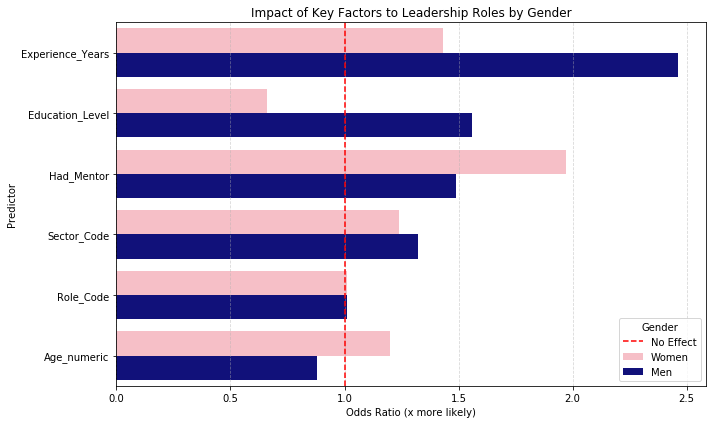

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_melted,
    x='Odds_Ratio',
    y='Feature',
    hue='Gender',
    palette={'Women': '#FFB6C1', 'Men': '#00008B'}
)

plt.axvline(x=1, color='red', linestyle='--', label='No Effect')
plt.title('Impact of Key Factors to Leadership Roles by Gender')
plt.xlabel('Odds Ratio (x more likely)')
plt.ylabel('Predictor')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig("Impact of Key Factors to Leadership Roles by Gender.png", dpi=300, bbox_inches='tight')
plt.show()




## Does mentorship play a significant role in helping women reach leadership roles?

Based on logistic regression, women who reported having had a mentor were twice as likely (2.0x) to have held a leadership position in the energy sector, even after controlling for experience, education, age, role type, and sector.

This effect was statistically significant (p < 0.05), suggesting mentorship plays a substantial role in advancing women’s leadership careers

while

men in the energy sector, the most influential factor in reaching leadership roles is years of experience (2.49x), followed by education level (1.53x) and having a mentor (1.5x).

Compared to women (where mentorship had a 2x effect), mentorship still matters for men, but experience dominates. Age slightly reduces leadership odds, possibly due to early advancement patterns or cohort effects.


# Which energy subsectors exhibit stronger gender equity?

In [36]:
gender_sector_df = df[['What is your current gender identity?', 'Leadership_role', 'Cleaned_Sector']]
leadership_by_sector_gender = gender_sector_df.groupby(['Cleaned_Sector', 'What is your current gender identity?'])['Leadership_role'].mean().unstack()
leadership_by_sector_gender = leadership_by_sector_gender.dropna(subset=['Female', 'Male']).round(2)


In [37]:
leadership_by_sector_gender['Gender_Gap'] = (leadership_by_sector_gender['Male'] - leadership_by_sector_gender['Female']).abs()


In [38]:
leadership_by_sector_gender = leadership_by_sector_gender.sort_values('Gender_Gap')


In [39]:
def highlight_oil_and_gas(row):
    color = 'background-color: red' if row.name == 'Oil & Gas' else ''
    return [color] * len(row)

leadership_by_sector_gender.style.apply(highlight_oil_and_gas, axis=1)


What is your current gender identity?,Female,Male,Gender_Gap
Cleaned_Sector,,,
Power,0.800000,0.830000,0.030000
Oil & Gas,0.670000,0.870000,0.200000


These values represent the proportion of individuals in leadership roles within each gender group per sector:

0.80 for Power, Female = 80% of women in the Power sector have held a leadership role

0.83 for Power, Male = 83% of men in Power sector have held a leadership role

Gender_Gap = |Male - Female| = absolute difference between genders in that sector

  What Does This Mean?
  Power sector (Gender_Gap = 0.03):
Very small difference between male and female leadership rates

Suggests strong gender equity — women are nearly as likely as men to hold leadership positions

  Oil & Gas (Gender_Gap = 0.20):
Large gap between men and women in leadership roles

Suggests less gender equity, women in Oil & Gas are significantly underrepresented in leadership



In [40]:
leadership_by_sector_gender_full = gender_sector_df.groupby(['Cleaned_Sector', 'What is your current gender identity?'])['Leadership_role'].mean().unstack()
leadership_by_sector_gender_full = leadership_by_sector_gender_full.round(2)
leadership_by_sector_gender_full['Gender_Gap'] = (leadership_by_sector_gender_full['Male'] - leadership_by_sector_gender_full['Female']).abs()
leadership_by_sector_gender_full


What is your current gender identity?,Female,Male,Gender_Gap
Cleaned_Sector,,,
Heat,NaN,1.00,NaN
Oil & Gas,0.67,0.87,0.20
Other,1.00,NaN,NaN
Power,0.80,0.83,0.03
Renewable,0.50,NaN,NaN


# How does access to mentorship differ between men and women, and does the gender of a mentor influence outcomes?

In [41]:
mentorship_rate_by_gender = df.groupby('What is your current gender identity?')['Had_Mentor'].mean().round(2)
mentorship_rate_by_gender


What is your current gender identity?
Female    0.83
Male      0.97
Name: Had_Mentor, dtype: float64

In [42]:
female_mentees = df[(df['What is your current gender identity?'] == 'Female') & (df['Mentor_Gender'].isin(['Male', 'Female']))].copy()


In [43]:
mentor_outcome = female_mentees.groupby('Mentor_Gender')['Leadership_role'].mean().round(2)
mentor_outcome


Mentor_Gender
Female    0.80
Male      0.78
Name: Leadership_role, dtype: float64

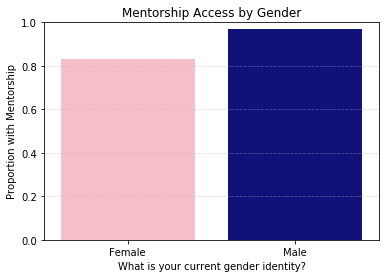

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    x=mentorship_rate_by_gender.index,
    y=mentorship_rate_by_gender.values,
    palette=['#FFB6C1', '#00008B']
)
plt.title('Mentorship Access by Gender')
plt.ylabel('Proportion with Mentorship')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.savefig("Mentorship Access by Gender.png", dpi=300, bbox_inches='tight')
plt.show()


In [45]:
# Filter only rows where mentor gender is Male or Female
mentor_leadership = df[df['Mentor_Gender'].isin(['Male', 'Female'])]

# Group by respondent gender and mentor gender
leadership_by_mentor_gender = mentor_leadership.groupby(['What is your current gender identity?', 'Mentor_Gender'])['Leadership_role'].mean().reset_index()

# Rename columns for clarity
leadership_by_mentor_gender.columns = ['Respondent_Gender', 'Mentor_Gender', 'Leadership_Rate']
leadership_by_mentor_gender['Leadership_Rate'] = leadership_by_mentor_gender['Leadership_Rate'].round(2)


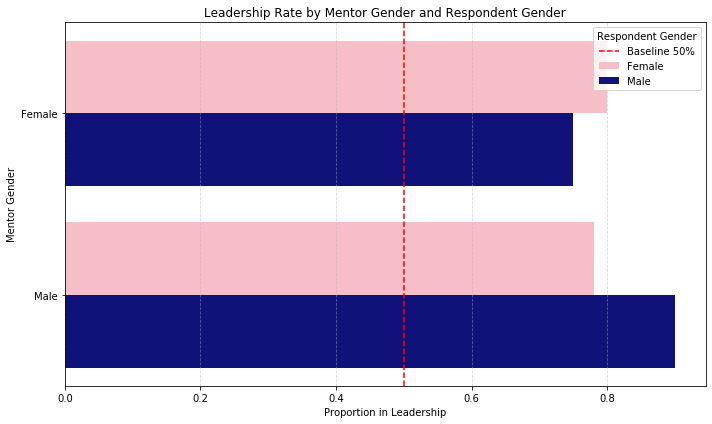

In [46]:


plt.figure(figsize=(10, 6))
sns.barplot(
    data=leadership_by_mentor_gender,
    x='Leadership_Rate',
    y='Mentor_Gender',
    hue='Respondent_Gender',
    palette={'Female': '#FFB6C1', 'Male': '#00008B'}
)

plt.axvline(x=0.5, color='red', linestyle='--', label='Baseline 50%')
plt.title('Leadership Rate by Mentor Gender and Respondent Gender')
plt.xlabel('Proportion in Leadership')
plt.ylabel('Mentor Gender')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Respondent Gender')
plt.tight_layout()
plt.savefig("Leadership Rate by Mentor Gender and Respondent Gender.png", dpi=300, bbox_inches='tight')
plt.show()


Mentorship plays a powerful role,those with mentors are more likely to hold leadership positions.

The gender of the mentor may impact leadership outcomes differently based on the respondent’s gender

Male mentors are more strongly associated with increased leadership outcomes among male respondents.

Female mentors offer a more balanced effect, providing a modest boost in leadership outcomes for female respondents.

Same-gender mentorship may be particularly effective in supporting leadership development. but the effect is slightly balanced.

# Do men and women perceive workplace gender equity differently, and does that perception change with years of experience?

In [47]:
df['Perception'] = df['To what extent do you agree that your company promotes gender equality? '].replace('Yes', 5)
df['Perception'] = pd.to_numeric(df['Perception'], errors='coerce')  # coerce any unexpected values to NaN



In [48]:
df['Perception'].dtype


dtype('int64')

In [49]:
df['Experience_Band'] = df['How many years of experience do you have in the energy sector?'].replace({
    'Less than 1 year': '<1',
    '1-3 years': '1–3',
    '4-7 years': '4–7',
    '8-12 years': '8–12',
    'More than 12 years': '13+'
})


In [50]:
df['Experience_Band'].value_counts()


4–7     20
8–12    16
1–3     10
13+      8
<1       6
Name: Experience_Band, dtype: int64

In [51]:
perception_summary = df.groupby(['What is your current gender identity?', 'Experience_Band'])['Perception'].mean().unstack().round(2)
perception_summary


Experience_Band,13+,1–3,4–7,8–12,<1
What is your current gender identity?,,,,,
Female,5.0,3.4,4.00,4.20,4.6
Male,5.0,4.4,4.62,4.45,5.0


In [52]:
pivot = df.pivot_table(
    index='What is your current gender identity?',
    columns='Experience_Band',
    values='Perception',
    aggfunc='mean'
).round(2)


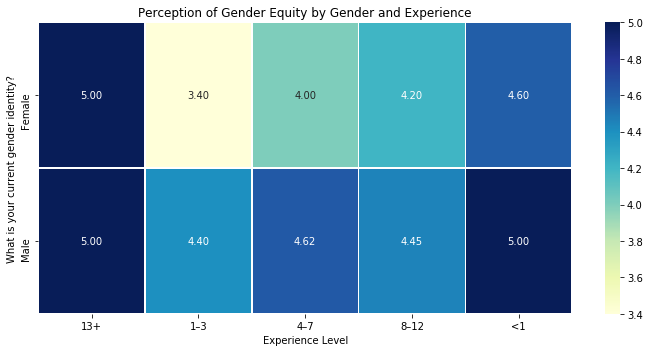

In [53]:

plt.figure(figsize=(10, 5))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title("Perception of Gender Equity by Gender and Experience")
plt.xlabel("Experience Level")
plt.ylabel("What is your current gender identity?")
plt.tight_layout()
plt.savefig("Perception of Gender Equity by Gender and Experience.png", dpi=300, bbox_inches='tight')
plt.show()

Men consistently perceive their workplaces as more supportive of gender equity than women do.
The perception gap is largest among early-career professionals (1–3 years), where women rate gender equity nearly 1 point lower than men.
However, women's perception improves with experience — reaching parity at senior levels — which may reflect increased advocacy, opportunity, or workplace adaptation over time.